# Pymaceuticals Inc.
---

### Analysis
* Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.
* Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study. 
* There is a strong correlation between mouse weight and tumor volume, indicating that mouse weight may be contributing to the effectiveness of any drug regimen.
* There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study. 

In [372]:
#Write Up (Observations)

print("1. First Observation: There exists a positive strong correlation between the weight of the mouse and the average tumor volume. In other words, for every one unit increase in weight, the tumor size, on average, will increase .84 mm3.")
print("")
print(f"2. Second Observation: Based upon the line graph for mouse b128 given treatment Capomulin, as the days on the treatement increase the tumor volume is also decreasing. This could indicate the medication is effective at decreasing tuor size.")
print("")
print("3. Third Observation: Based upon the box and whisker plot, Inbufinol is the only one of four regimens with an outlier. Additionally, inbufinol and ceftamin have the higher (appr 60) final tumor volume median, compared to Capomulin and Ramicane. ")

1. First Observation: There exists a positive strong correlation between the weight of the mouse and the average tumor volume. In other words, for every one unit increase in weight, the tumor size, on average, will increase .84 mm3.

2. Second Observation: Based upon the line graph for mouse b128 given treatment Capomulin, as the days on the treatement increase the tumor volume is also decreasing. This could indicate the medication is effective at decreasing tuor size.

3. Third Observation: Based upon the box and whisker plot, Inbufinol is the only one of four regimens with an outlier. Additionally, inbufinol and ceftamin have the higher (appr 60) final tumor volume median, compared to Capomulin and Ramicane. 


In [97]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_results = study_results.set_index('Mouse ID')
mouse_metadata = mouse_metadata.set_index('Mouse ID')

In [196]:
results = study_results.join(mouse_metadata,how='inner').reset_index()
results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23


## Summary Statistics

In [152]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
results_tumor_vol = results[['Drug Regimen','Tumor Volume (mm3)']]

mean_df = results_tumor_vol.groupby(['Drug Regimen']).mean()
mean_df = mean_df.rename(columns={'Tumor Volume (mm3)':'Mean Tumor Volume'})

median_df = results_tumor_vol.groupby(['Drug Regimen']).median()
median_df = median_df.rename(columns={'Tumor Volume (mm3)':'Median Tumor Volume'})

variance_df = results_tumor_vol.groupby(['Drug Regimen']).var()
variance_df = variance_df.rename(columns={'Tumor Volume (mm3)':'Tumor Volume Variance'})

std_df = results_tumor_vol.groupby(['Drug Regimen']).std()
std_df = std_df.rename(columns={'Tumor Volume (mm3)':'Tumor Volume Std. Dev.'})

sem_df = results_tumor_vol.groupby(['Drug Regimen']).sem()
sem_df = sem_df.rename(columns={'Tumor Volume (mm3)':'Tumor Volume Std. Err.'})

summary_df = pd.concat([mean_df, median_df, variance_df, std_df, sem_df],axis=1)
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [153]:
bar_chart_df = results_tumor_vol.groupby(['Drug Regimen']).count().rename(columns={'Tumor Volume (mm3)':'Number of Data Points'}).sort_values(by=['Number of Data Points'],ascending=False).reset_index()
bar_chart_df

,Drug Regimen,Number of Data Points
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Placebo,181
6,Stelasyn,181
7,Ceftamin,178
8,Infubinol,178
9,Propriva,161


## Bar and Pie Charts

Text(0, 0.5, 'Number of Data Points')

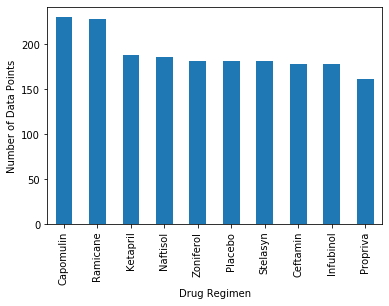

In [154]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
bar_chart_pd = bar_chart_df.plot.bar(x= 'Drug Regimen', y = 'Number of Data Points',rot='vertical',legend=None)
bar_chart_pd.set_ylabel('Number of Data Points')

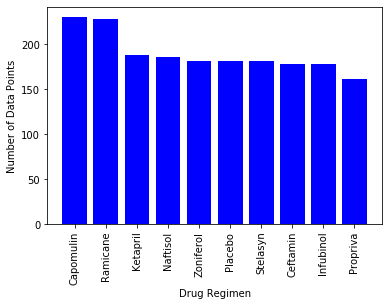

In [155]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(bar_chart_df['Drug Regimen'],bar_chart_df['Number of Data Points'],color='b',align='center')
plt.xticks(bar_chart_df['Drug Regimen'],rotation='vertical')
plt.ylabel('Number of Data Points')
plt.xlabel('Drug Regimen')
plt.show()

In [182]:
pie_plot_df = results[['Sex','Mouse ID']]
pie_plot_df = pie_plot_df.groupby(['Sex']).count().rename(columns={'Mouse ID':'Sex'}).rename_axis(None)
pie_plot_df

,Sex
Female,935
Male,958


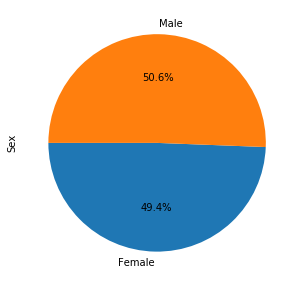

In [201]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_plot_df.plot.pie(y='Sex',figsize=(5,5),autopct='%1.1f%%',legend=None,startangle=180)

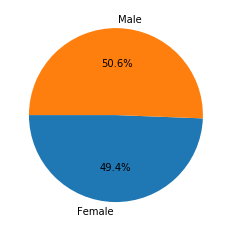

In [206]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pie_plot_df['Sex'],labels=pie_plot_df.index,autopct='%1.1f%%',startangle=180)
plt.show()

## Quartiles, Outliers and Boxplots

In [249]:
# Calculate the final tumor volume of each mouse. 
final_tumor_df = results[results.groupby(['Mouse ID'])['Timepoint'].transform(max) == results['Timepoint']]
final_tumor_df = final_tumor_df.reset_index().drop(['index'],axis=1)
final_tumor_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [272]:
# Calculate the final tumor volume of each mouse in Capomulin treatment regime. 
capomulin_final_df = final_tumor_df.loc[final_tumor_df['Drug Regimen']=='Capomulin']
capomulin_final_df = capomulin_final_df.reset_index().drop(['index'],axis=1)
capomulin_final_df.head()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = capomulin_final_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)

print(f"The lower quartile tumor volume is: {lowerq}")
print(f"The upper quartile tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {round(quartiles[0.5],2)} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

print("")
outlier_df = capomulin_final_df.loc[(capomulin_final_df['Tumor Volume (mm3)'] < lower_bound) | (capomulin_final_df['Tumor Volume (mm3)'] > upper_bound)]
print(f"Capomulin potential outliers: {outlier_df['Tumor Volume (mm3)']}")

The lower quartile tumor volume is: 32.38
The upper quartile tumor volume is: 40.16
The interquartile range of tumor volume is: 7.78
The the median of tumor volume is: 38.13 
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [269]:
# Calculate the final tumor volume of each mouse in Ramicane treatment regime. 

ramicane_final_df = final_tumor_df.loc[final_tumor_df['Drug Regimen']=='Ramicane']
ramicane_final_df = ramicane_final_df.reset_index().drop(['index'],axis=1)
ramicane_final_df.head()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = ramicane_final_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)

print(f"The lower quartile tumor volume is: {lowerq}")
print(f"The upper quartile tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {round(quartiles[0.5],2)} ")

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

print("")
outlier_df = ramicane_final_df.loc[(ramicane_final_df['Tumor Volume (mm3)'] < lower_bound) | (ramicane_final_df['Tumor Volume (mm3)'] > upper_bound)]
print(f"Ramicane potential outliers: {outlier_df['Tumor Volume (mm3)']}")

The lower quartile tumor volume is: 31.56
The upper quartile tumor volume is: 40.66
The interquartile range of tumor volume is: 9.1
The the median of tumor volume is: 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.

Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [273]:
# Calculate the final tumor volume of each mouse in Infubinol treatment regime. 

infubinol_final_df = final_tumor_df.loc[final_tumor_df['Drug Regimen']=='Infubinol']
infubinol_final_df = infubinol_final_df.reset_index().drop(['index'],axis=1)
infubinol_final_df.head()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = infubinol_final_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)

print(f"The lower quartile tumor volume is: {lowerq}")
print(f"The upper quartile tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {round(quartiles[0.5],2)} ")

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

print("")
outlier_df = infubinol_final_df.loc[(infubinol_final_df['Tumor Volume (mm3)'] < lower_bound) | (infubinol_final_df['Tumor Volume (mm3)'] > upper_bound)]
print(f"Infubinol potential outliers: {outlier_df['Tumor Volume (mm3)']}")

The lower quartile tumor volume is: 54.05
The upper quartile tumor volume is: 65.53
The interquartile range of tumor volume is: 11.48
The the median of tumor volume is: 60.17 
Values below 36.83 could be outliers.
Values above 82.75 could be outliers.

Infubinol potential outliers: 5    36.321346
Name: Tumor Volume (mm3), dtype: float64


In [274]:
# Calculate the final tumor volume of each mouse in Ceftamin treatment regime. 

ceftamin_final_df = final_tumor_df.loc[final_tumor_df['Drug Regimen']=='Ceftamin']
ceftamin_final_df = ceftamin_final_df.reset_index().drop(['index'],axis=1)
ceftamin_final_df.head()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = ceftamin_final_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)

print(f"The lower quartile tumor volume is: {lowerq}")
print(f"The upper quartile tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {round(quartiles[0.5],2)} ")

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

print("")
outlier_df = ceftamin_final_df.loc[(ceftamin_final_df['Tumor Volume (mm3)'] < lower_bound) | (ceftamin_final_df['Tumor Volume (mm3)'] > upper_bound)]
print(f"Ceftamin potential outliers: {outlier_df['Tumor Volume (mm3)']}")

The lower quartile tumor volume is: 48.72
The upper quartile tumor volume is: 64.3
The interquartile range of tumor volume is: 15.58
The the median of tumor volume is: 59.85 
Values below 25.35 could be outliers.
Values above 87.67 could be outliers.

Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


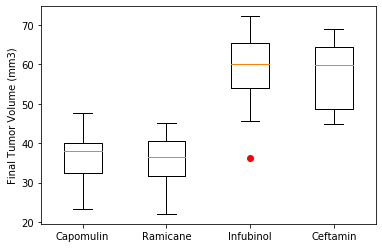

In [327]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_cap = capomulin_final_df['Tumor Volume (mm3)'].values
box_ram = ramicane_final_df['Tumor Volume (mm3)'].values
box_ibu = infubinol_final_df['Tumor Volume (mm3)'].values
box_ceft = ceftamin_final_df['Tumor Volume (mm3)'].values

drugs = [box_cap,box_ram,box_ibu,box_ceft]

fig1, ax1 = plt.subplots()
ax1.boxplot(drugs,sym='red')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1,2,3,4],['Capomulin','Ramicane','Infubinol','Ceftamin'])
plt.show()

## Line and Scatter Plots

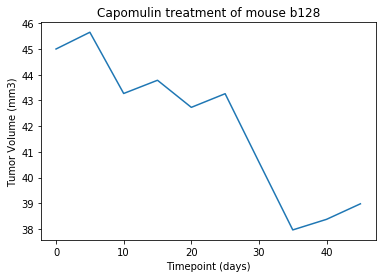

In [342]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = results[results['Drug Regimen'] == 'Capomulin']
days = capomulin_df.loc[results['Mouse ID']=='b128']['Timepoint'].values
volume = capomulin_df.loc[results['Mouse ID']=='b128']['Tumor Volume (mm3)'].values
plt.plot(days,volume)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse b128')
plt.show()

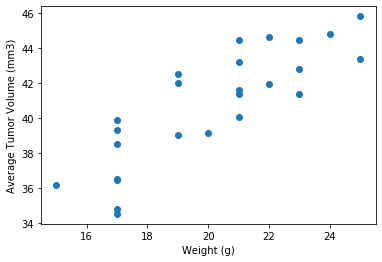

In [354]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
average_df = capomulin_df.groupby(['Mouse ID']).mean()
avg_tum_vol = average_df['Tumor Volume (mm3)'].values
weight = average_df['Weight (g)'].values
plt.scatter(weight,avg_tum_vol)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

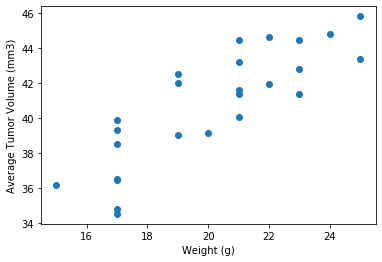

In [358]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
average_df = capomulin_df.groupby(['Mouse ID']).mean()
avg_tum_vol = average_df['Tumor Volume (mm3)'].values
weight = average_df['Weight (g)'].values
plt.scatter(weight,avg_tum_vol)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


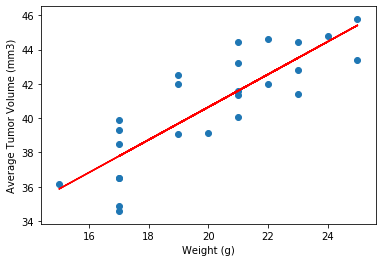

The correlation between mouse weight and the average tumor volume is 0.84


In [365]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress

average_df = capomulin_df.groupby(['Mouse ID']).mean()
avg_tum_vol = average_df['Tumor Volume (mm3)'].values
weight = average_df['Weight (g)'].values

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, avg_tum_vol)
regress_values = weight * slope + intercept

plt.plot(weight,regress_values,"r-")
plt.scatter(weight,avg_tum_vol)

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}")